In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
#import src.rainbow
import os
import glob
import pickle
import time


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import the jsonified transactions into a dataframe

In [22]:
path = '/Users/Sarah/galvanize/dsi-capstone/data/jsons/2018'
all_files = glob.glob(os.path.join(path, "*.json"))

In [ ]:
df = pd.concat((pd.read_json(f,keep_default_dates=False,lines=True) for f in all_files)) 

In [ ]:
for types in df.type.unique():
    print(types)    

In [ ]:
df=df[df['type']=='Checkout']

In [ ]:
df.drop(columns='type',inplace=True)

In [ ]:
print("terminals (registers):",df.term.unique())

Drop transactions from register other than 1-9. Register 10 is the customer service desk returns register. Register 11 is the worker self checkout register.

In [ ]:
df=df[df['term']<10]

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df['account'].fillna([],inplace=True)

In [ ]:
df = pd.concat([df,df2], axis=0, ignore_index=True)

In [11]:
df['date']=pd.to_datetime(df['date'],yearfirst=True)

In [12]:
df['day_of_week']=df['date'].dt.day_name()
df['month']=df['date'].dt.month

In [13]:
df['hour']=pd.to_datetime(df['time']).dt.hour

In [15]:
pickle.dump(df,open('./data/pickles/df2018.p','wb'))

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
import os
import glob
import pickle
import time

In [4]:
df = pickle.load(open('./data/pickles/df2018.p','rb'))

In [6]:
df.sample(10)

,account,date,gross+,gross-,items,net,oper,term,time,trans,day_of_week,month,hour
1745,[ Account 7189],2018-04-16,45.55,0.0,"[[, BAG ROMAINE HEART, 4.99, 12], [MR, SF Bag ...",45.55,81,5,17:18,199,Monday,4,17
292,[ Account 3324],2018-02-17,54.28,0.0,"[[, PANGMU, 5.99, 13], [, MILKADAMIA-ORIGINL, ...",54.28,98,1,10:37,53,Saturday,2,10
1110,[ Account 3011],2018-03-08,186.69,0.0,"[[MP, BAG CREDIT, -0.65, 23], [, LEMONS, 3.820...",186.69,11,7,14:27,113,Thursday,3,14
1512,[ Account 1479],2018-05-20,29.58,0.0,"[[, BORM1.5LT JAR t167, 3.99, 6], [, BORM.5LCA...",29.58,81,7,16:20,194,Sunday,5,16
3081,[ Account 2507],2018-03-31,95.80,0.0,"[[, COLTIBUONO CHIANTI, 14.99, 10], [, COCKTAI...",95.80,79,3,19:43,324,Saturday,3,19
2235,[ Account 5650],2018-05-08,21.00,4.0,"[[, CLARA RAW GOAT QT, 9.09, 13], [DP, BOTTLE ...",17.00,28,6,19:49,159,Tuesday,5,19
1589,[ Account 7371],2018-11-15,32.74,0.0,"[[, ABC COOKIE, 2.25, 17], [, BLUE BOTTLE COFF...",32.74,6,2,16:49,175,Thursday,11,16
1211,[ Account 6565],2018-03-13,51.43,15.5,"[[, UME PLUM VINEGAR, 3.99, 15], [, UME PLUM V...",35.93,58,7,15:36,120,Tuesday,3,15
1710,[ Account 6539],2018-01-26,39.79,0.0,"[[, ARUGULA LOOSE, 5.17, 12], [, 8 OZ BIO TUB ...",39.79,16,5,16:58,73,Friday,1,16
2472,[ Account 5903],2018-07-28,10.43,0.0,"[[, NP Biotin 10000 90, 9.69, 1]]",10.43,6,7,19:51,263,Saturday,7,19


In [24]:
df[['hour','gross+']].groupby(['hour']).agg(['mean'])

,gross+
,mean
hour,
6,2.490000
7,21.666667
8,15.897191
9,59.385448
10,71.561264
11,71.083230
12,64.039047
13,63.466839


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(-13915.903999999966, 292233.9839999993)

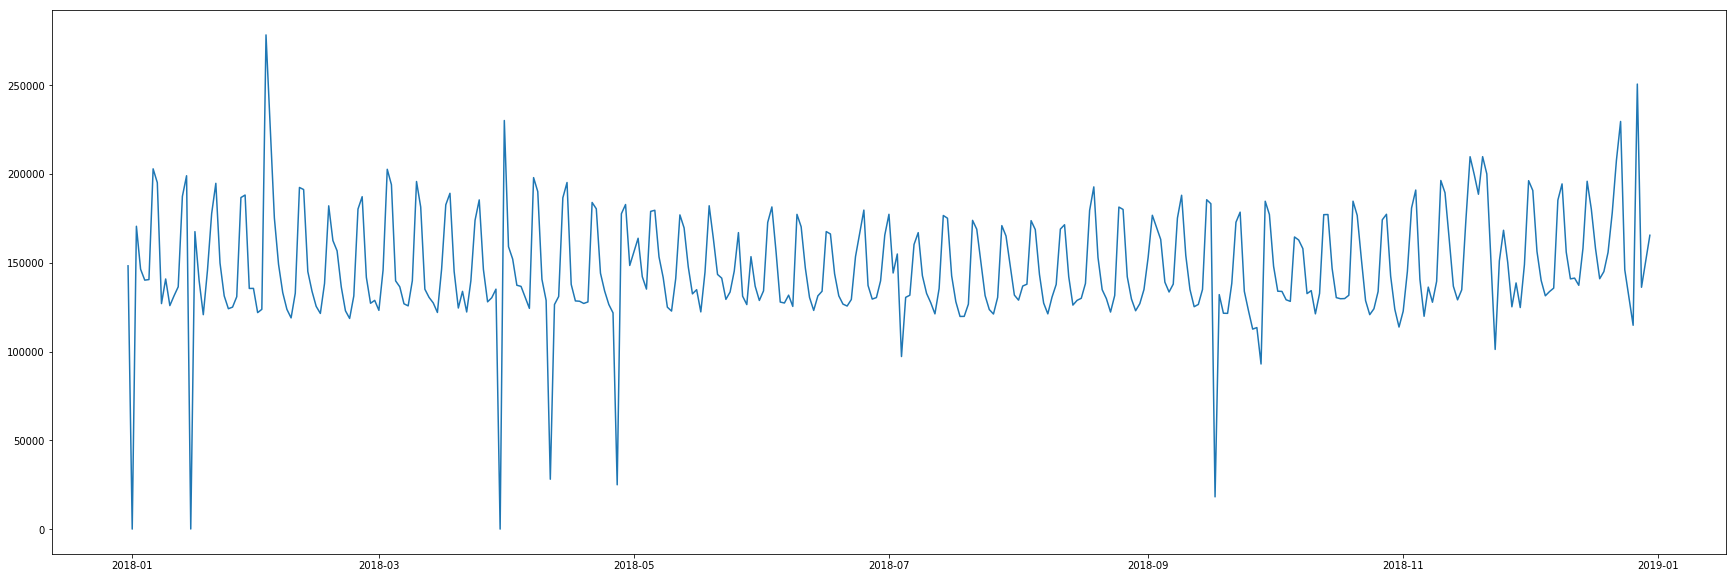

In [7]:
plt.figure(figsize=(30,10))
plt.plot(df[['date','net']].groupby(['date']).agg(['sum']))
#plt.plot(df[['date','net']].groupby(['date']).agg(['count']),color="red")
plt.ylim()

(-232.25, 4899.25)

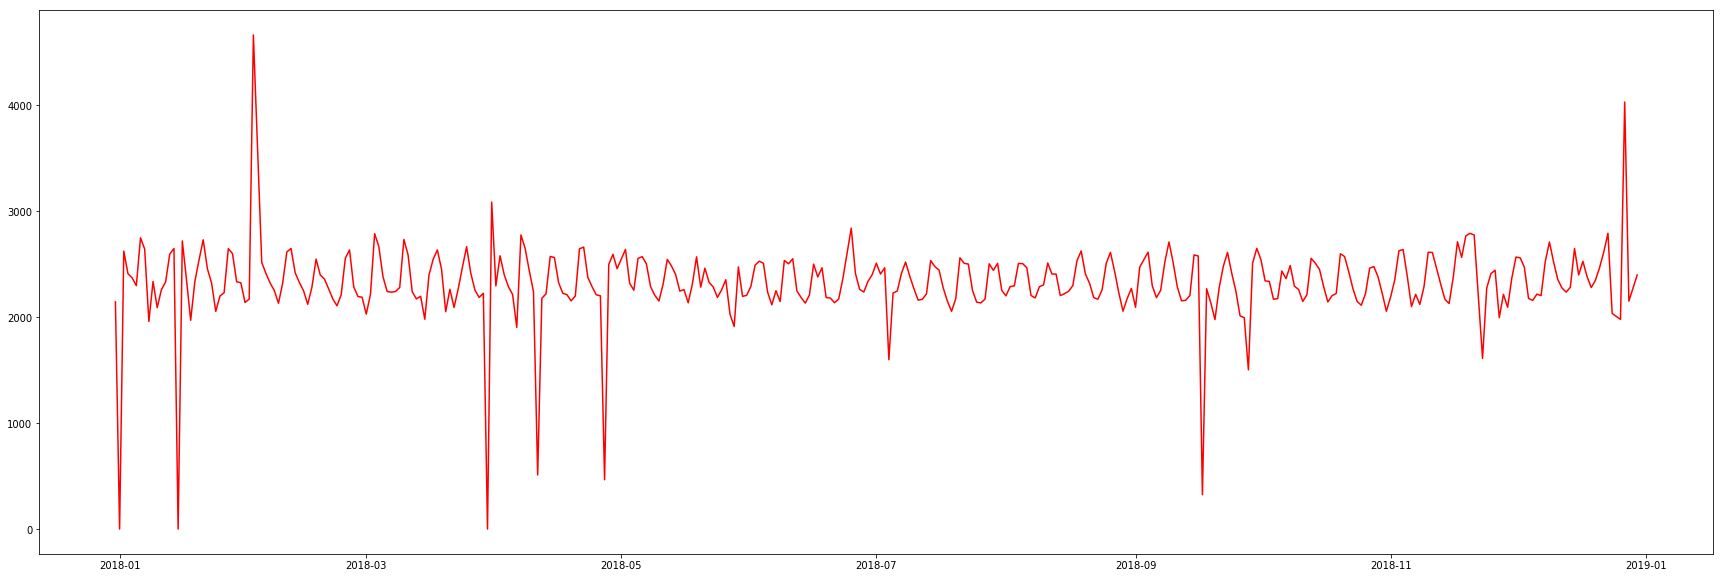

In [6]:
plt.figure(figsize=(30,10))
#plt.plot(df[['date','net']].groupby(['date']).agg(['sum']))
plt.plot(df[['date','net']].groupby(['date']).agg(['count']),color="red")
plt.ylim()

In [7]:
#ten largest transactions in 2018
sorted(df['net'])[:-10:-1]

[8195.04,
 5531.62,
 3727.59,
 2690.78,
 2448.98,
 2372.87,
 2371.82,
 2343.81,
 2304.46]

In [8]:
for i in df[df['net']== df['net'].max()]['items']:
    for t in i:
        print (t)


['', 'HARMLESS H. 16 OZ', 2290.0, 13]
['', 'SMALL COOLER CRV', 25.0, 13]
['', 'HARMLESS H. 16 OZ', 2290.0, 13]
['', 'SMALL COOLER CRV', 25.0, 13]
['', 'HARMLESS H. 16 OZ', 36.64, 13]
['', 'SMALL COOLER CRV', 0.4, 13]
['', 'BLUE BOTTLE COFFEE', 1750.0, 13]
['', 'BLUE BOTTLE COFFEE', 1750.0, 13]
['', 'BLUE BOTTLE COFFEE', 28.0, 13]


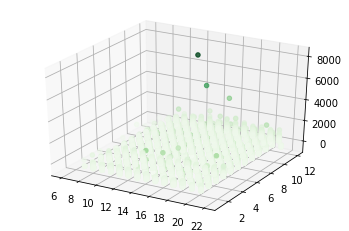

In [20]:
from mpl_toolkits import mplot3d
fig = plt.figure() #figsize=(30,20)
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = df['net'].values
xdata = df['hour'].values
ydata = df['month'].values

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
df.drop(columns='type',inplace=True)

In [8]:
def get_items(df,most_common=10,least_common=5):
    #df['total_of_items'] = 0
    stoppers = ['BAG CREDIT','SF Bag Charge','Gift Card Reload','8 OZ BIO TUB t3', '16OZ BIO TUB t4',
                 '32OZ BIO TUB t5','8 OZ PLSTC TUB t3','16 OZ PLSTC TUB t4','BOTTLE DEPOSIT','6PACK BEER SMALL C','PAID IN','Gift Card Sale',
                'PACKAGED FOOD', ]  
    '''build a dictionary where the keys are the words
    in the dataframe items column'''
    stopwords =[]
    items=[]
    item_dict = defaultdict(int)
    basket_counts=[]
    
    for basket in df['items']:
        basket_counts.append(len(basket))
        for item in basket:
            if item[0]=='MP':
                pass
            items.append(item[1])
            item_dict[item[1]] += 1
    
    items_set=set(items)

    '''add the most common words to the stopwords list'''
    stopwords=list([i[0] for i in Counter(item_dict).most_common(most_common)])
    

    '''if topics_list exist, add these to stopwords to reveal next layer down'''
    '''
    if topics_list:
        for topics in topics_list:
            for i in topics:
                stopwords.append(i)'''
            
    '''add predetermined stoppers to stopwords list'''
    for s in stoppers:
        stopwords.append(s)
        
    '''add items containing "CRV" to the stopwords list'''
    for item in items_set:
        if "crv" in item.lower():
            stopwords.append(item)
    
    '''add the least common words to the stopwords list'''
    for key,value in item_dict.items():
        if value < least_common:
            stopwords.append(key)
    print(type(stopwords))
    #print(stopwords)
    stopwords_set = set(stopwords)
    
    '''iterate through the baskets and add items to items_set
    if not in stopwords (too common or too uncommon)'''
    for stops in stopwords_set:
        if stops in items_set:
            items_set.remove(stops)
  

    return items_set,stopwords_set, item_dict, basket_counts

items_set,stopwords,item_dict, basket_counts = get_items(df,most_common=9,least_common=15)

<class 'list'>


In [9]:
item_dict['ONIONS YELLOW']/len(basket_counts)

0.07883948205426786

In [10]:
Counter(item_dict).most_common(25)

[('BAG CREDIT', 686340),
 ('SF Bag Charge', 202311),
 ('SMALL COOLER CRV', 165926),
 ('Sr. 10% Produce', 116295),
 ('BANANAS', 112832),
 ('Sr. 10% Pkg Food', 107592),
 ('Sr. 10% Bulk', 107381),
 ('Sr. 10% Refrigera', 99653),
 ('AVOCADOS HASS', 83821),
 ('ONIONS YELLOW', 65538),
 ('Sr. 10% Bakery', 65411),
 ('8 OZ BIO TUB t3', 59298),
 ('CRV LRG SING NOTAX', 56447),
 ('APPLES FUJI', 53397),
 ('CRV SMALL SING T', 52733),
 ('Sr. 10% Cheese', 52355),
 ('CRV SMALL NO TAX', 51829),
 ('GARLIC WHITE', 47491),
 ('Sr. 10% BB TX', 47284),
 ('Sr. 10% Vitamin TX', 43880),
 ('LARGE COOLER CRV', 41899),
 ('LEMONS', 41487),
 ('16OZ BIO TUB t4', 39260),
 ('PEPPERS RED BELL', 37254),
 ('CELERY', 36782)]

In [17]:
import random
random.sample(items_set,14)

['CAS SCRUB SPONGE 3',
 'HP Stone Root 1oz',
 'FIG & APRICOT',
 'AG GreenSuperFood',
 'FC GARLIC GRANULES',
 'CLNWL BATHRM SPRAY',
 'Harrys Argan Oil 2',
 'Mink Cream Brow Pe',
 'BAMBOO POT SCRAPER',
 'NP-HERITAGE CEREAL',
 'NG Selenium 8oz',
 'DON POMO TOM SOUP',
 'WSOY -NONFAT PLAIN',
 'NF VegiDay Van']

In [18]:
len(items_set)

28869

In [19]:
df['items'].sample(10)

1394    [[, POPART NORI POPCRN, 3.89, 15], [, KALA NAM...
512     [[, RIVER RUN SYRAH, 16.99, 10], [, La Parisie...
1904    [[MP, BAG CREDIT, -0.15, 23], [, 6830 WILDFLWE...
1944    [[, NF-COCO MILK POWDR, 2.59, 15], [, tink ric...
1613    [[, LAVAZZA COFFEE, 5.99, 15], [, POTATOES JAP...
774     [[, BHAKTI CHAI COFFEE, 9.57, 13], [, SMALL CO...
2339    [[, MUSHROOM CRIMINI, 2.17, 12], [, OSCAR WILD...
2141    [[, CASA CHICAS ORG, 3.99, 15], [MP, BAG CREDI...
1924    [[, ANNIE SHIITAKE SES, 11.58, 15], [, BONTERR...
659     [[, PELLEGRINO -750 ML, 2.19, 15], [, CRV LRG ...
Name: items, dtype: object

In [20]:
df['items'].iloc[1939]

[['', '7TH AUTO DISH 75 O', 8.99, 7],
 ['', 'RN Flora Adult 30c', 19.54, 1],
 ['', 'TW Daily 1 NoIron1', 34.38, 1],
 ['', 'Clearly Natural So', 4.6, 4],
 ['', 'FF Shampoo', 9.9, 4],
 ['', 'STRAUS MILK GALLON', 8.49, 13],
 ['', 'BROCCOLI  BUNCHED', 3.99, 12],
 ['', 'TOMATOES ROMA', 1.28, 12],
 ['', 'ROASTED VEG. RAVIO', 7.59, 19],
 ['', 'ENDIVE BELGIAN', 2.07, 12],
 ['', 'LAMB CHOPPER', 4.4, 14],
 ['', 'SCHARF.BTTRSWT BAR', 7.39, 15],
 ['MP', 'BAG CREDIT', -0.1, 23]]

In [12]:
df['item_count']=basket_counts

In [13]:
percentile = np.percentile(basket_counts, [25, 50, 75,100])
q1=percentile[0]
q2=percentile[1]
q3=percentile[2]
q4=percentile[3]
avg=np.mean(basket_counts)

In [14]:
q1,q2,q3,q4,avg

(5.0, 10.0, 20.0, 287.0, 14.48987229394527)

In [15]:
avg//1-1,avg//1+1

(13.0, 15.0)

In [16]:
dfq1=df[(df['item_count']<=q1)]
dfq2=df[(df['item_count']>q1 )& (df['item_count']<=q2)]
dfq3=df[(df['item_count']>q2 )& (df['item_count']<=q3)]
dfq4=df[df['item_count']>q3]
df_avg=df[(df['item_count']>=avg//1-1 )& (df['item_count']<=avg//1+1)]

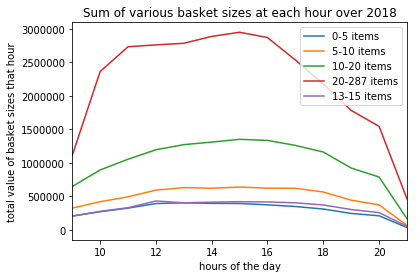

In [21]:
plt.plot(dfq1[['hour','net']].groupby(['hour']).agg(['sum']),label='0-%d items'%q1)
plt.plot(dfq2[['hour','net']].groupby(['hour']).agg(['sum']),label='%d-%d items'%(q1,q2))
plt.plot(dfq3[['hour','net']].groupby(['hour']).agg(['sum']),label='%d-%d items'%(q2,q3))
plt.plot(dfq4[['hour','net']].groupby(['hour']).agg(['sum']),label='%d-%d items'%(q3,q4))
plt.plot(df_avg[['hour','gross+']].groupby(['hour']).agg(['sum']),label='%d-%d items'%(avg//1-1,avg//1+1))
plt.xlabel('hours of the day')
plt.ylabel('total value of basket sizes that hour')
plt.xlim(9,21)
plt.title("Sum of various basket sizes at each hour over 2018")
plt.legend()

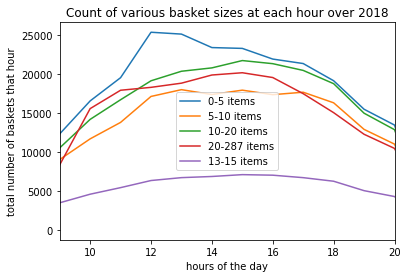

In [22]:
plt.plot(dfq1[['hour','net']].groupby(['hour']).agg(['count']),label='0-%d items'%q1)
plt.plot(dfq2[['hour','net']].groupby(['hour']).agg(['count']),label='%d-%d items'%(q1,q2))
plt.plot(dfq3[['hour','net']].groupby(['hour']).agg(['count']),label='%d-%d items'%(q2,q3))
plt.plot(dfq4[['hour','net']].groupby(['hour']).agg(['count']),label='%d-%d items'%(q3,q4))
plt.plot(df_avg[['hour','net']].groupby(['hour']).agg(['count']),label='%d-%d items'%(avg//1-1,avg//1+1))
plt.xlabel('hours of the day')
plt.ylabel('total number of baskets that hour')
plt.xlim(9,20)
plt.title("Count of various basket sizes at each hour over 2018")

plt.legend()

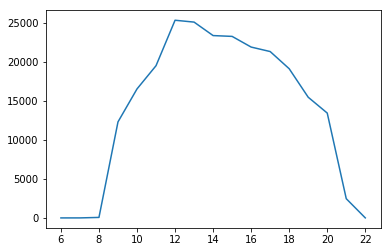

In [34]:
plt.plot(dfq1[['hour','month']].groupby(['hour']).agg(['count']),label='0-%d items'%q1)

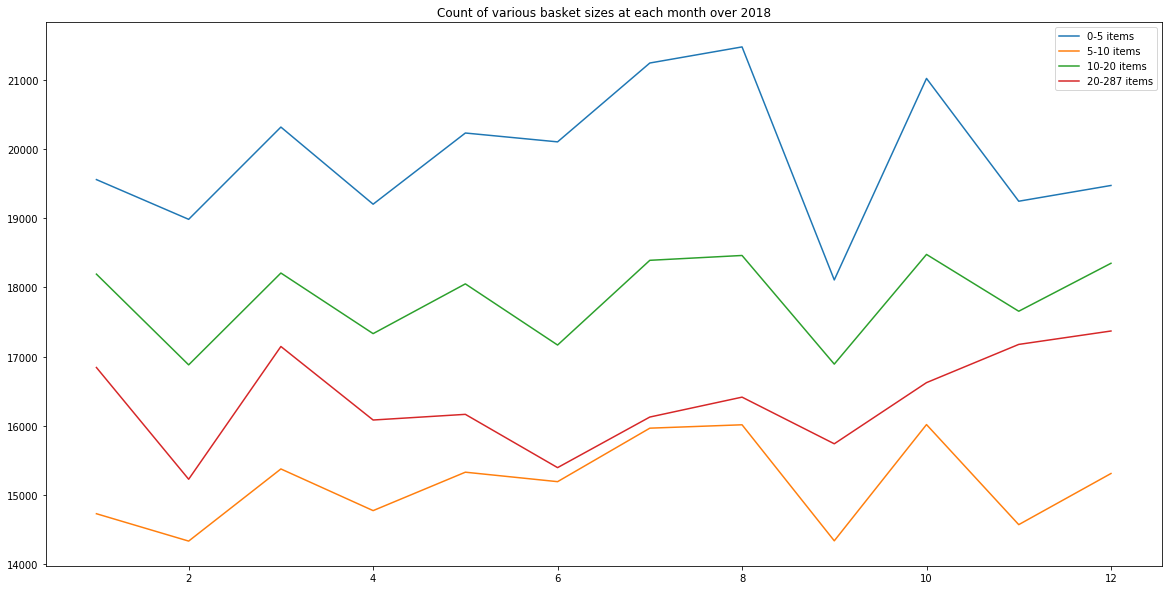

In [24]:
plt.figure(figsize=(20,10))
plt.plot(dfq1[['month','gross+']].groupby(['month']).agg(['count']),label='0-%d items'%q1)
plt.plot(dfq2[['month','gross+']].groupby(['month']).agg(['count']),label='%d-%d items'%(q1,q2))
plt.plot(dfq3[['month','gross+']].groupby(['month']).agg(['count']),label='%d-%d items'%(q2,q3))
plt.plot(dfq4[['month','gross+']].groupby(['month']).agg(['count']),label='%d-%d items'%(q3,q4))
#plt.plot(df_avg[['month','gross+']].groupby(['month']).agg(['count']),label='%d-%d items'%(avg//1-1,avg//1+1))
plt.title("Count of various basket sizes at each month over 2018")

plt.legend()

In [ ]:
for m in range(1,13):
    d=df[df['month']==m]
    print (d[['month','item_count']].groupby(['month']).agg(['mean']))

In [ ]:
for m in range(1,13):
    d=df_avg[df_avg['month']==m]
    print (d[['month','item_count']].groupby(['month']).agg(['max']))

In [ ]:
df = df[df['item_count']>q2]

In [ ]:
df['item_count'].max()

In [ ]:
plt.scatter(dfq1['time'],dfq1['item_count'])

In [17]:
item_matrix = np.zeros((df.shape[0],len(items_set)))

In [18]:
df_items= pd.DataFrame(item_matrix,columns=items_set)

In [19]:
df.index

Int64Index([   5,    9,   10,   12,   13,   14,   15,   16,   17,   18,
            ...
            2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824],
           dtype='int64', length=831284)

In [20]:
df=df.reset_index()

In [21]:
df.index

RangeIndex(start=0, stop=831284, step=1)

In [22]:
df.describe()

,index,gross+,gross-,net,oper,term,trans,month,hour,item_count
count,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000,831284.000000
mean,1270.845914,65.388330,2.079210,63.309240,52.691926,4.376811,158.393187,6.529922,14.608928,14.489872
std,736.755845,197.046072,182.565605,72.540467,27.672120,2.548131,108.165460,3.447604,3.185471,13.849315
min,0.000000,0.000000,0.000000,-481.450000,1.000000,1.000000,1.000000,1.000000,6.000000,0.000000
25%,635.000000,17.490000,0.000000,17.210000,26.000000,2.000000,71.000000,4.000000,12.000000,5.000000
50%,1262.000000,41.700000,0.000000,41.050000,55.000000,4.000000,144.000000,7.000000,15.000000,10.000000
75%,1890.000000,85.070000,0.000000,83.670000,78.000000,6.000000,228.000000,10.000000,17.000000,20.000000
max,3335.000000,89473.800000,89374.990000,8195.040000,110.000000,9.000000,678.000000,12.000000,22.000000,287.000000


In [23]:
df.pop('index')
print ()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831284 entries, 0 to 831283
Data columns (total 14 columns):
account        831284 non-null object
date           831284 non-null datetime64[ns]
gross+         831284 non-null float64
gross-         831284 non-null float64
items          831284 non-null object
net            831284 non-null float64
oper           831284 non-null int64
term           831284 non-null int64
time           831284 non-null object
trans          831284 non-null int64
day_of_week    831284 non-null object
month          831284 non-null int64
hour           831284 non-null int64
item_count     831284 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 88.8+ MB


In [25]:
df_items.sample(10)

,NW ChildPrimadophi,BOOKS AND GIFTS,NC Pr Postnatal 48,TIKI CAT-CHICKEN,ORANGE CARROT JUIC,breathe pure Aroma,DB Benfotiamin 300,SWISS URCHRUTER,ORGANIC BALSAMIC,SPRING B MAPLE SYR,...,Naturcolor 4R,CABOT R/F SHRP CHE,Honey Orange Balm,RATTLESNAKE CHEDDA,OGLESHIELD,GINGER PEAR,Cici's Anise Cky,BLENHEIM APRICOT J,ALIVE&H TEMPEH PAT,Light Mountain Hen
108023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
459785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.iloc[:,0].index


RangeIndex(start=0, stop=831284, step=1)

In [27]:
df_items.iloc[:,0].index

RangeIndex(start=0, stop=831284, step=1)

In [28]:
col_index_dict = dict(zip(items_set, range(len(items_set))))

In [29]:
col_index_dict['BANANAS']

KeyError: 'BANANAS'

In [30]:
df.shape[0]

831284

In [31]:
matrix_dict = defaultdict(int)
for i in range(df.shape[0]):
    for item in df['items'][i]:
        #set matrix to boolean for item precence in basket:
        #if item[1] not in stopwords and item[3] != 12:
        #if item[1] not in stopwords and item[3] not in (12,16):
        if item[1] not in stopwords:
            if item[2] > 0:
                value = 1
            elif item[2] == 0:
                value = 0
            else:
                value = -1
            matrix_dict[i,col_index_dict[item[1]]] += value

In [32]:
for item in items_set:
    if item.upper().startswith('ONION'):
        print (item)

ONION RELISH
ONION GRANULATES
ONION ITALIAN RED
ONION CIPOLLINI
ONION BIALYS
ONIONS WHITE
ONION POWDER
ONIONS YELLOW
ONIONS GREEN
ONIONS RED
ONIONS SPRING
ONIONS SWEET


In [33]:
len(matrix_dict)

6461222

In [34]:
for key,value in matrix_dict.items():
    print (key[0])
    print (key[1])
    print (value)
    break

0
5046
1


In [35]:
rows, cols, vals = [], [], []
for key, value in matrix_dict.items():
    rows.append(key[0])
    cols.append(key[1])
    vals.append(matrix_dict[key])
sparse_matrix = sparse.csr_matrix((vals, (rows, cols)))

In [217]:
sparse_matrix.shape

(831284, 28869)

In [115]:
df_items= pd.SparseDataFrame(sparse_matrix,columns=list(items_set))

In [ ]:
pickle.dump(df_items,open('./data/pickles/df_items2018.p','wb'))

In [3]:
file = open("./data/pickles/df_items2018.p",'rb')
df_items = pickle.load(file)
file.close()

In [39]:
df_items['BANANAS'].count()


108662

In [171]:
df_items.shape

(831284, 28875)

In [172]:
df.shape

(831284, 15)

In [63]:
df_all = pd.concat([df, df_items], axis=1)

In [64]:
del df
del df_items

In [65]:
pickle.dump(df_all,open('./data/pickles/df_all2018.p','wb'))

In [5]:
file = open("./data/pickles/df_all2018.p",'rb')
df_all = pickle.load(file)
file.close()

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df['hour'],df_items['BANANAS'])

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831284 entries, 0 to 831283
Data columns (total 15 columns):
account           831284 non-null object
date              831284 non-null datetime64[ns]
gross+            831284 non-null float64
gross-            831284 non-null float64
items             831284 non-null object
net               831284 non-null float64
oper              831284 non-null int64
term              831284 non-null int64
time              831284 non-null object
trans             831284 non-null int64
day_of_week       831284 non-null object
month             831284 non-null int64
hour              831284 non-null int64
total_of_items    831284 non-null int64
item_count        831284 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 95.1+ MB


In [ ]:
df_all=df_all[df_all['ONIONS YELLOW']>0]

In [19]:
df_all[['ONIONS YELLOW','APPLES FUJI']].values.shape
df_all['hour'].values.reshape(-1,1).shape

(831284, 1)

Text(0.5, 0.92, 'People want Onions, every month, every hour.')

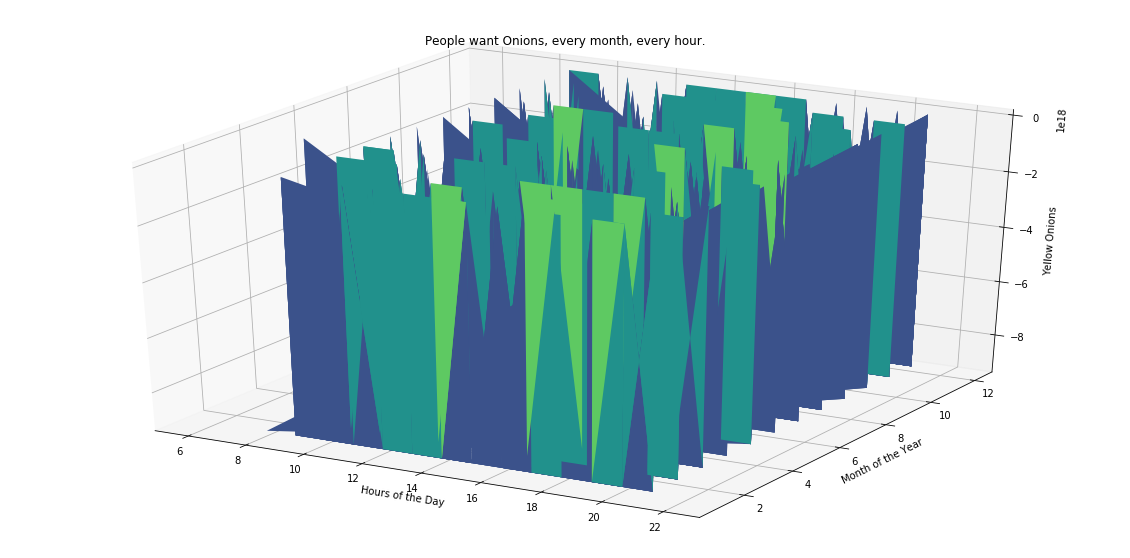

In [20]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20,10)) #figsize=(30,20)
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = df_all[['ONIONS YELLOW','APPLES FUJI']].values
xdata = df_all['hour'].values.reshape(-1,1)
ydata = df_all['month'].values.reshape(-1,1)
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.plot_surface(xdata, ydata, zdata, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('Hours of the Day')
ax.set_ylabel('Month of the Year')
ax.set_zlabel('Yellow Onions')
ax.set_title('People want Onions, every month, every hour.')


In [ ]:
df_all.fillna(value=0,inplace=True)

In [168]:
len(rows)

9152288

# This is an important part:

In [ ]:
import pickle

In [169]:
sparse_matrix[::6535]

<128x28875 sparse matrix of type '<class 'numpy.int64'>'
	with 1294 stored elements in Compressed Sparse Row format>

In [36]:
pickle.dump(sparse_matrix,open('./data/pickles/sparse_matrix2018.p','wb'))

In [37]:
pickle.dump(items_set,open('./data/pickles/items_set2018.p','wb'))

In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
import os
import glob
import pickle
import time


In [3]:
file = open("./data/pickles/sparse_matrix2018.p",'rb')
sparse_matrix = pickle.load(file)
file.close()

In [4]:
file = open("./data/pickles/items_set2018.p",'rb')
items_set = pickle.load(file)
file.close()

In [38]:
sparse_matrix = (sparse_matrix > 0).astype(int)

In [39]:
sum_of_zeros=sum(np.sum(sparse_matrix,axis=1)==0)
print(sum_of_zeros / sparse_matrix.shape[0],"% of zero weight baskets")

[[0.03428912]] % of zero weight baskets


In [47]:
number_of_components = 10

In [48]:
def fit_NMF(sparse_matrix_,n_components_,max_iter=250):
    from sklearn.decomposition import NMF
    model = NMF(n_components=n_components_,max_iter=max_iter)
    W = model.fit_transform(sparse_matrix_)
    H=model.components_
    model_iter = model.n_iter_
    return model,W,H,model_iter
model,W,H,model_iter = fit_NMF(sparse_matrix,n_components_=number_of_components,max_iter=250)

In [49]:
print('iterations:',model_iter,'W shape:',W.shape,'H shape:',H.shape)

iterations: 108 W shape: (831284, 10) H shape: (10, 28869)


In [50]:
w = np.zeros_like(W)
w[np.arange(len(W)), W.argmax(1)] = 1
topic_strength = np.sum(w,axis=0)
topic_strength = np.round(topic_strength/topic_strength.sum(),2)
for i,t in enumerate(topic_strength):
    print('topic %d strength: %f '%(i,t))

topic 0 strength: 0.050000 
topic 1 strength: 0.030000 
topic 2 strength: 0.030000 
topic 3 strength: 0.240000 
topic 4 strength: 0.020000 
topic 5 strength: 0.020000 
topic 6 strength: 0.020000 
topic 7 strength: 0.570000 
topic 8 strength: 0.010000 
topic 9 strength: 0.020000 


from sklearn.decomposition import LatentDirichletAllocation as LDA
model = LDA(n_components=2,max_iter=10)
W = model.fit_transform(sparse_matrix)
H = model.components_
model.n_iter_

In [51]:
for topic in H:
    print (topic[:-10:-1])

[0.00283741 0.00620822 0.00338591 0.         0.00045685 0.00049876
 0.         0.         0.01049822]
[0.00024833 0.00036325 0.         0.00095714 0.0002005  0.00020782
 0.00049239 0.00018434 0.        ]
[0.00040234 0.00885146 0.00271898 0.00079378 0.00044767 0.00037664
 0.00076891 0.00096157 0.00087717]
[0.00151812 0.01226784 0.00423117 0.         0.         0.00018951
 0.00239841 0.00163433 0.00129999]
[0.         0.00609322 0.00121705 0.         0.         0.0002745
 0.00132972 0.         0.00029968]
[0.         0.         0.00249458 0.00032444 0.         0.00085079
 0.         0.00240519 0.00117673]
[0.00000000e+00 1.01140363e-04 3.07621943e-03 5.29552717e-03
 0.00000000e+00 1.22216890e-03 6.77330459e-05 0.00000000e+00
 0.00000000e+00]
[0.00053597 0.00588174 0.01864734 0.01159193 0.00164251 0.0096149
 0.01112442 0.00044793 0.01451634]
[7.40252039e-04 1.47019486e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.70588324e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0.       

In [52]:
feature_names=list(items_set)
n_top_words=15
for topic in H:
    print(topic.argsort()[:-n_top_words -1:-1])
    print ([feature_names[i]for i in topic.argsort()[:-n_top_words -1:-1]])
    print()

[14645 19901 19868 13574  2005  6628 12314 23540  3703  2161  7781 19971
 27200 14364  8603]
['5290 WALNUTS', '5250 ORG PECAN HA', '5132 R/NS ALMONDS', '5150or BRAZIL NUTS', '5101 ROAST CASHEWS', '6645 SUNFLWR SEEDS', '5277  RAW PISTACH', '5180 WHOLE CASHEWS', '3290 THOMPSON RAIS', '5150 BRAZIL NUTS', '3295  FLAME RAISIN', '6560  PUMPKIN SEED', '3144 OG DR CRANBER', '5161 CASHEW PIECES', '3486 SLICED ALMOND']

[13613  5619 11358 26196  3668  3399 28018  1761  1791 15315 11743  5979
 28635  4891 22265]
['BAGEL', 'OV CRM CHEESE SPRE', 'GINA MARIE CC', 'OV CREAM CHEESE', "NANCY'S ORGANIC CR", 'SIERRA ORG CC TUB', 'MORNING PASTRY/MUF', 'SCONES/MUFFINS', "TOFUTTI PLAIN ''CH", 'SEMIFREDDIS BAGUET', 'ESTHERS PRETZELS', 'MONTEREY JACK CHEE', 'SEMIFREDDIS LOAF', 'SEMIFREDDIS', 'KITE HILL CHIVE']

[25481 14385 15956  2208  8810 20637  3010   802  8494  7998 25887 22508
  5711  6514  5894]
['REFRIGERATED', 'INDIAN BENTO', 'SPINACH PEASANT PI', "GLORIA'S WRAPS", 'EPICUREAN', 'URBAN REMEDY', "GLORI

0.05 Topic #0 of 10:
['5290 WALNUTS', '5250 ORG PECAN HA', '5132 R/NS ALMONDS', '5150or BRAZIL NUTS', '5101 ROAST CASHEWS', '6645 SUNFLWR SEEDS', '5277  RAW PISTACH', '5180 WHOLE CASHEWS', '3290 THOMPSON RAIS', '5150 BRAZIL NUTS', '3295  FLAME RAISIN', '6560  PUMPKIN SEED', '3144 OG DR CRANBER', '5161 CASHEW PIECES', '3486 SLICED ALMOND']
<img src="./img/2018/1555024457.topic0.png">
0.03 Topic #1 of 10:
['BAGEL', 'OV CRM CHEESE SPRE', 'GINA MARIE CC', 'OV CREAM CHEESE', "NANCY'S ORGANIC CR", 'SIERRA ORG CC TUB', 'MORNING PASTRY/MUF', 'SCONES/MUFFINS', "TOFUTTI PLAIN ''CH", 'SEMIFREDDIS BAGUET', 'ESTHERS PRETZELS', 'MONTEREY JACK CHEE', 'SEMIFREDDIS LOAF', 'SEMIFREDDIS', 'KITE HILL CHIVE']
<img src="./img/2018/1555024457.topic1.png">
0.03 Topic #2 of 10:
['REFRIGERATED', 'INDIAN BENTO', 'SPINACH PEASANT PI', "GLORIA'S WRAPS", 'EPICUREAN', 'URBAN REMEDY', "GLORIA'S BURRITO", 'PANGMU', 'LA CASCADA', 'PERFECT PAPAS', 'LENTIL SALAD', 'ORGANIC CARROT 16', 'SUPERFRESH SANDWIC', 'PEASANT PIE G

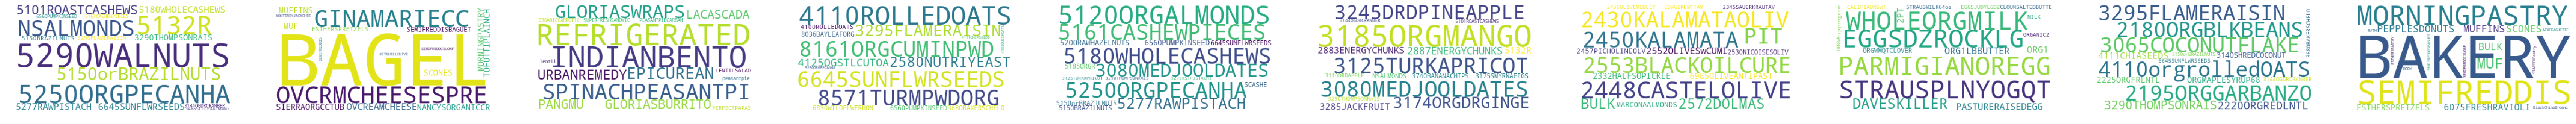

In [74]:
def print_top_items(model, feature_names, n_top_words):
    topic_dict = defaultdict()
    topics_list =[]
    fig = plt.figure(1,figsize=(100,100))
    for topic_idx, topic in enumerate(model.components_):
        print(topic_strength[topic_idx],"Topic #%d of %d:" %( topic_idx,number_of_components))
        #topic_string=(" ".join([feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topic_string=[feature_names[i]for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_dict[topic_idx]=topic_string
        topics_list.append(topic_string)
        print(topic_string)
        #print()
        wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(str(topic_string).replace(" ", '').replace("'",""))
        #wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(str(topic_string).replace("'","").replace(",",""))
        ax = fig.add_subplot(1,number_of_components,topic_idx+1)
        ax.imshow(wordcloud)
        ax.axis("off")
        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
        '''plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()'''
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        img_time=str(time.time()).split('.')[0]
        wordcloud.to_file('./img/2018/%s.topic%d.png'%(img_time,topic_idx))
        print('<img src="./img/2018/%s.topic%d.png">'%(img_time,topic_idx))
    plt.savefig("./img/2018/%s.all%dtopics.png"%(img_time,topic_idx))
    print('<img src="./img/2018/%s.all%dtopics.png">'%(img_time,topic_idx))
    
    return topic_dict,topics_list

topic_dict,topics_list = print_top_items(model,list(items_set),n_top_words)
#print(topics_list)

In [68]:
pickle.dump(sparse_matrix,open('./data/pickles/topics_list2018.p','wb'))

In [57]:
topic_compare = np.zeros([len(topic_dict),len(topic_dict)])

for topic in topic_dict:
    for item in topic_dict[topic]:
        for topic2 in topic_dict:
            if item in topic_dict[topic2]:
                topic_compare[topic,topic2]+=1
print (topic_strength)            
print(topic_compare)


[0.05 0.03 0.03 0.24 0.02 0.02 0.02 0.57 0.01 0.02]
[[15.  0.  0.  4.  9.  4.  0.  0.  5.  0.]
 [ 0. 15.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0. 15.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0. 15.  3.  0.  0.  0.  4.  0.]
 [ 9.  0.  0.  3. 15.  3.  0.  0.  3.  0.]
 [ 4.  0.  0.  0.  3. 15.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0. 15.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. 15.  0.  0.]
 [ 5.  0.  0.  4.  3.  2.  0.  0. 15.  0.]
 [ 0.  6.  0.  0.  0.  0.  1.  0.  0. 15.]]


In [58]:
list_of_topics=[]
for topic in topic_dict:
     list_of_topics.append(topic_dict[topic])

In [59]:
topic_matrix=np.array(topics_list).T
topic_matrix.shape

(15, 10)

In [60]:
pd.DataFrame(topic_matrix,columns=topic_strength)

,0.05,0.03,0.03,0.24,0.02,0.02,0.02,0.57,0.01,0.02
0,5290 WALNUTS,BAGEL,REFRIGERATED,4110 ROLLED OATS,5120 ORG ALMONDS,3185 ORG MANGO,2448 CASTEL OLIVE,PARMIGIANO REGG,4110org rolledOATS,BAKERY
1,5250 ORG PECAN HA,OV CRM CHEESE SPRE,INDIAN BENTO,6645 SUNFLWR SEEDS,5180 WHOLE CASHEWS,3080 MEDJOOL DATES,2553BLACK OIL CURE,WHOLE ORG MILK,3295 FLAME RAISIN,SEMIFREDDIS
2,5132 R/NS ALMONDS,GINA MARIE CC,SPINACH PEASANT PI,8161 ORG CUMIN PWD,5250 ORG PECAN HA,3125 TURK APRICOT,2430 KALAMATA OLIV,STRAUS PLN YOG QT,2180 ORG BLK BEANS,MORNING PASTRY/MUF
3,5150or BRAZIL NUTS,OV CREAM CHEESE,GLORIA'S WRAPS,8571 TURM PWD ORG,5161 CASHEW PIECES,3245 DRD PINEAPPLE,2450 KALAMATA-PIT,EGGS DZ ROCK LG,2195 ORG GARBANZO,SCONES/MUFFINS
4,5101 ROAST CASHEWS,NANCY'S ORGANIC CR,EPICUREAN,3295 FLAME RAISIN,3080 MEDJOOL DATES,3174 ORG DR GINGE,2572 DOLMAS,DAVE'S KILLER,3065 COCONUT FLAKE,BULK
5,6645 SUNFLWR SEEDS,SIERRA ORG CC TUB,URBAN REMEDY,2580 NUTRI YEAST,5277 RAW PISTACH,2887 ENERGY CHUNKS,BULK,PASTURE RAISED EGG,3290 THOMPSON RAIS,PEPPLES DONUTS
6,5277 RAW PISTACH,MORNING PASTRY/MUF,GLORIA'S BURRITO,4125 OG STL CUT OA,6560 PUMPKIN SEED,2883 ENERGY CHUNKS,2552 OLIVES wCUMI,ORG 1LB BUTTER,2220 ORG RED LNTL,6075 FRESH RAVIOLI
7,5180 WHOLE CASHEWS,SCONES/MUFFINS,PANGMU,6560 PUMPKIN SEED,5200 RAW HAZELNUTS,3285JACK FRUIT,6985 OLIVEANTIPAST,ORG 1/2 & 1/2 PT,4111 CHIA SEEDS,ESTHERS PRETZELS
8,3290 THOMPSON RAIS,TOFUTTI PLAIN ''CH,LA CASCADA,8036 BAY LEAF ORG,5150or BRAZIL NUTS,5132 R/NS ALMONDS,2332 HALF SOPICKLE,ORG WM QT CLOVER,ORG MAPLE SYRUP 68,Black China Browni
9,5150 BRAZIL NUTS,SEMIFREDDIS BAGUET,PERFECT PAPAS,6830 WILDFLWER HON,6645 SUNFLWR SEEDS,3740 BANANA CHIPS,2457 PICHOLINE OLV,EGGS JUDY LG DZ,2225 ORG FR LNTL,ACME BAGUETTE


In [61]:
topic_matrix=np.array(topics_list).T
print (topic_matrix.shape)
topic_df = pd.DataFrame(topic_matrix,columns=topic_strength)

(15, 10)


In [62]:
import tabulate 

In [63]:
print()
print(tabulate.tabulate(topic_df.values,topic_df.columns, tablefmt="pipe")) 


| 0.05               | 0.03               | 0.03               | 0.24               | 0.02               | 0.02               | 0.02               | 0.57               | 0.01               | 0.02               |
|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|:-------------------|
| 5290 WALNUTS       | BAGEL              | REFRIGERATED       | 4110 ROLLED OATS   | 5120 ORG ALMONDS   | 3185 ORG MANGO     | 2448 CASTEL OLIVE  | PARMIGIANO REGG    | 4110org rolledOATS | BAKERY             |
| 5250 ORG PECAN HA  | OV CRM CHEESE SPRE | INDIAN BENTO       | 6645 SUNFLWR SEEDS | 5180 WHOLE CASHEWS | 3080 MEDJOOL DATES | 2553BLACK OIL CURE | WHOLE ORG MILK     | 3295  FLAME RAISIN | SEMIFREDDIS        |
| 5132 R/NS ALMONDS  | GINA MARIE CC      | SPINACH PEASANT PI | 8161 ORG CUMIN PWD | 5250 ORG PECAN HA  | 3125 TURK APRICOT  | 2430 KALAMATA OLIV | ST

In [115]:
for i,topics in enumerate(topics_list):
    print ('topic %d'%i)
    for topic in topics:
        print (topic)
        

topic 0
PEPPERS RED BELL
CELERY
CARROTS LOOSE
SQUASH ZUCCHINI
CUCUMBERS
BROCCOLI LOOSE
KALE DINO
BEANS GREEN
SPINACH LOOSE
CILANTRO
ONIONS RED
MUSHROOM CRIMINI
ONIONS GREEN
CARROTS BUNCH
LETTUCE SALAD MIX
PARSLEY ITALIAN
ARUGULA LOOSE
TOMATO DRY FARM
POTATOES GARNET
PEPPERS GREEN BELL
topic 1
BANANAS
1lb STRAWBERRY
BAGEL
APPLES GALA
ORANGES NAVEL
PEACH
NECTARINE
SPINACH LOOSE
REFRIGERATED
APPLES PINK LADY
WHOLE ORG MILK
BLUEBERRY
ORANGES VALENCIA
MANGO
GRAPES RED
PEAR BARTLETT
5290 WALNUTS
KIWI LOOSE
LETTUCE SALAD MIX
3185 ORG MANGO
topic 2
AVOCADOS HASS
TOMATO MIX HEIRLOO
LIMES
1lb STRAWBERRY
CUKE MEDIT/PERSIAN
PEACH
TOMATO DRY FARM
NECTARINE
ARUGULA LOOSE
SPINACH LOOSE
LETTUCE SALAD MIX
BLUEBERRY
MANGO
CARROTS BUNCH
ONIONS RED
TOMATO
CORN
LEMONS MEYER
CUCUMBERS
ASPARAGUS
topic 3
APPLES FUJI
ORANGES NAVEL
CARROTS BUNCH
SATSUMA MANDARIN
PEAR BARTLETT
BAGEL
PEAR BOSC
ORANGES VALENCIA
5290 WALNUTS
PERSIMMONS FUYU
1lb STRAWBERRY
GRAPEFRUIT
TOMATO DRY FARM
REFRIGERATED
GRAPES RED
3185 ORG 

In [ ]:
ingredients =np.array((len(topics),len(topics[0])))
for row in topics:
    print('row',row)
    for i,item in enumerate(topics[row]):
        if item not in topics[row]:
            print ('i',i,item)
            
        if item not in topics[0]:
            print ('iI',i,item)
        #ingredients[row:i]=item
ingredients

In [ ]:
len(ing_set)

In [ ]:
ing_index_dict = dict(zip(ing_set, range(len(ing_set))))

In [ ]:
ingredients=np.array(ingredients)
ingredients=ingredients.reshape(5,55)

In [ ]:
ingredients.shape

In [ ]:
ing_matrix=np.zeros(ingredients.shape)

In [ ]:
for row,col in enumerate(ingredients):
    for i,c in enumerate(col):
        #print(row,i,c)
        ing_matrix[row,i]=ing_index_dict[c]
ing_matrix

In [ ]:
ing_array=ing_index_dict.values()

ing_array

In [ ]:
for i in ing_matrix:
    print(ing_array==i)

In [ ]:
for ing_index_dict

In [60]:
def print_basket_contents(basket_id):
    basket=[]
    #print('+++++++++++++++++++++++next basket+++++++++++++++++')
    for items in df['items'][basket_id]:
        #for item in items:
        print("item:",items)
        
    #return basket
#print_basket_contents(1116)

In [61]:
def print_top_baskets(model, W, n_top_words):
    baskets = []
    for topic_idx, w in enumerate(W.T):
        basket_string=str([df['items'][i] for i in w.argsort()[:-n_top_words - 1:-1]])
        count = 0
        for i in w.argsort()[:-n_top_words - 1:-1]:
            count+=1
            print("++++++++++++++++++Topic #%d, basket #%d+++++++++++++++++++"%(topic_idx,count))
            print_basket_contents(i)
        #print_basket_contents([i for i in w.argsort()[:-n_top_words - 1:-1]])
        baskets.append(basket_string)
        #print(basket_string)
        #print()
        '''wordcloud = WordCloud(max_font_size=500, max_words=1000, background_color="white").generate(basket_string.replace(" ", "_").replace("'",""))

        # Display the generated image:
        #plt.figure(1,figsize=(10,10))
 bb       plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #plt.savefig('topic%d.png'%topic_idx)
        #plt.close()
        wordcloud.to_file('topic%d.png'%topic_idx)'''
print_top_baskets(model,W,10)

++++++++++++++++++Topic #0, basket #1+++++++++++++++++++
item: ['', 'PEACH', 11.68, 12]
item: ['', 'GOLD BAR', 2.12, 12]
item: ['', 'EGGPLANT GLOBE', 2.48, 12]
item: ['', 'NF-COCO MILK- SIMP', 2.99, 15]
item: ['', 'NF-COCO MILK- SIMP', 2.99, 15]
item: ['', 'CHARD RED', 1.99, 12]
item: ['', 'TOMATILLOS', 4.74, 12]
item: ['', '3715 GOJI GRANOLA', 8.48, 16]
item: ['', 'ONIONS GREEN', 0.99, 12]
item: ['', 'ONIONS GREEN', 0.99, 12]
item: ['', 'SQUASH ZUCCHINI', 3.0, 12]
item: ['', 'CUCUMBERS', 2.77, 12]
item: ['', 'CARROTS BUNCH', 2.99, 12]
item: ['', 'KALE DINO', 2.39, 12]
item: ['', 'CILANTRO', 1.5899999999999999, 12]
item: ['', 'CILANTRO', 1.5899999999999999, 12]
item: ['', 'WOODSTK EDAMAME po', 3.19, 19]
item: ['', 'STRAWBERRY LOOSE', 4.89, 12]
item: ['', 'TOMATO DRY FARM', 6.26, 12]
item: ['', 'WOODSTK GREEN PEAS', 3.19, 19]
item: ['', 'WOODSTK GREEN PEAS', 3.19, 19]
item: ['', 'CABBAGE RED', 2.44, 12]
item: ['', 'PLUOT/PLUM RED', 4.39, 12]
item: ['', 'HERBS BASIL', 2.49, 12]
item: [''

<BarContainer object of 7 artists>

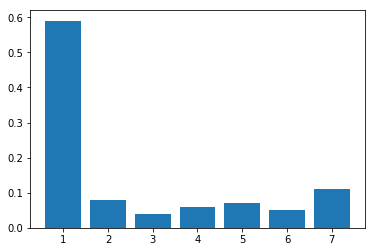

In [46]:
#plt.xlabel = ['Stir Fry','Fruit','Soup','Garlic & Mushrooms','Lemons & Kale','Salad','Salsa']

y = [0.59,0.08,0.04,0.06,0.07,0.05,0.11]
x = [1,2,3,4,5,6,7]
plt.bar(x,y)
plt.title()

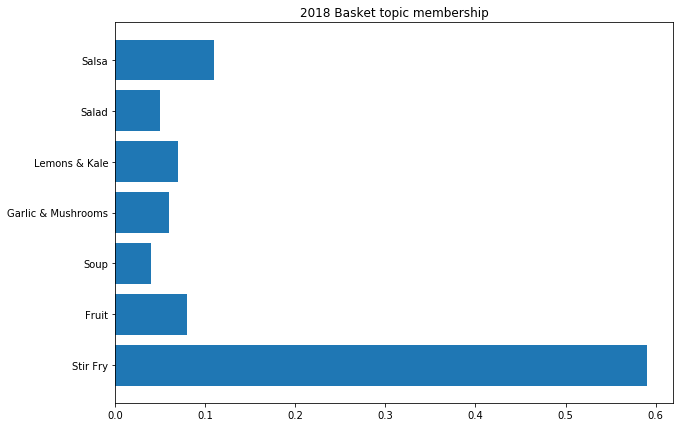

In [66]:
x_values = [0.59,0.08,0.04,0.06,0.07,0.05,0.11]
y_values = ['Stir Fry','Fruit','Soup','Garlic & Mushrooms','Lemons & Kale','Salad','Salsa']

y_axis = np.arange(0,len(x_values), 1)
fig=plt.figure(figsize=(10,7))
plt.barh(y_axis, x_values, align='center')
plt.yticks(y_axis, y_values)
#plt.set_xticklabels(['{:,.2%}'.format(x) for x in x_values])
plt.title("2018 Basket topic membership")
plt.savefig("./img/2018baksetTopicMembership")
plt.show()

In [60]:
pwd

'/Users/Sarah/galvanize/dsi-capstone'